In [12]:
# 데이터셋을 다운로드 받습니다 상위 data폴더 내부에 .zip파일로 다운로드가 됩니다
import os
import requests
import zipfile

# 1. 경로 설정 (로컬 환경에 맞춤)
project_path = r'C:\Users\Admin\autoint'
data_path = os.path.join(project_path, 'data')

# data 폴더가 없으면 생성
if not os.path.exists(data_path):
    os.makedirs(data_path)
    print(f"폴더 생성 완료: {data_path}")

# 2. 다운로드 설정
url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
zip_file_path = os.path.join(data_path, "ml-1m.zip")

# 3. 데이터 다운로드 (wget 대신 requests 사용)
if not os.path.exists(zip_file_path):
    print("데이터 다운로드 중... 잠시만 기다려 주세요.")
    response = requests.get(url)
    with open(zip_file_path, "wb") as f:
        f.write(response.content)
    print("다운로드 완료!")
else:
    print("이미 파일이 존재합니다.")

# 4. 압축 해제 (unzip 대신 zipfile 라이브러리 사용)
print("압축 해제 중...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)
print(f"압축 해제 완료! 위치: {data_path}")

# 5. 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(data_path))

이미 파일이 존재합니다.
압축 해제 중...
압축 해제 완료! 위치: C:\Users\Admin\autoint\data
현재 폴더 파일 목록: ['field_dims.npy', 'label_encoders.pkl', 'ml-1m', 'ml-1m.npy', 'ml-1m.zip', 'movielens_rcmm_v2.csv']


In [ ]:
# 시각화에 필요한 라이브러리 다운로드
%pip install pandas plotly seaborn matplotlib

In [14]:
# 라이브러리 호출
import re
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rc('font', family='NanumMyeongjo')

In [15]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [16]:
data_path = '../data/ml-1m'

In [17]:
# 데이터를 불러옵니다.
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [18]:
# 유저는 6040명이 있구요 유저의 특징은 5개가있습니다.
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
# 레이팅은 100만개가 있구요 특징은 4개가있습니다
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
# 영화는 3800개 3개의 특징
print(movies.shape)
movies.head() # 마지막 MovieID를 확인하려면 head() 대신 tail()로 확인해 보세요.

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
# 영화의 년도가 제목에 붙어있어서 그부분을 규칙적으로 처리해서 year특징을 만들어줬습니다

# 이 정규표현식은 '괄호 안에 있는 숫자4개만 뽑아주세요.'라는 의미입니다.
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [22]:
# 장르도 겹쳐있어서 행을 늘려서 장르를 모두 표현해줘봤습니다 - 시각화를 먼저 해보기 위함

movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


In [ ]:
# !pip install --upgrade pip

%pip install nbformat

In [24]:
# plotly 버전(로컬 환경 또는 클라우드 노트북 환경에서 실행시켜 주세요!)
px.histogram(movies_exploded, x='genres_split', height=450, title='장르별 영화 수').update_xaxes(categoryorder="total descending")

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
c:\Users\Admin\anaconda3\envs\autoint\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.

c:\Users\Admin\anaconda3\envs\autoint\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.

c:\Users\Adm

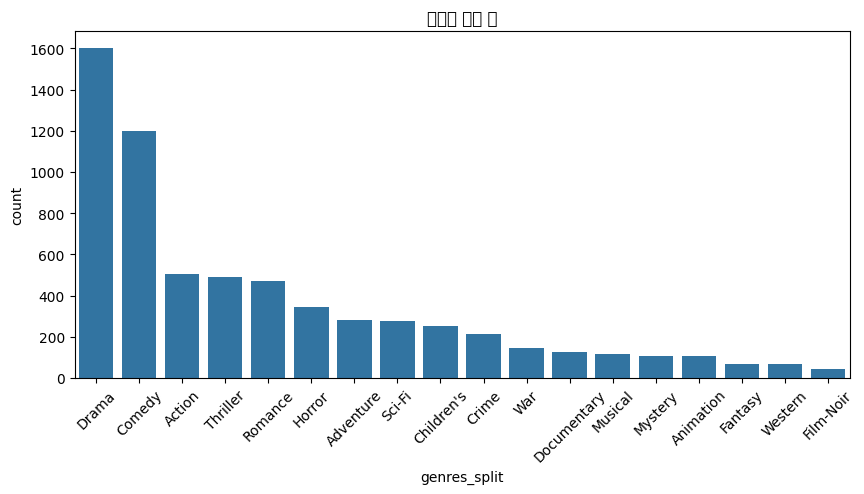

In [25]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)
plt.show()

In [26]:
# plotly 버전
movie_count_by_year = px.histogram(movies, x='year', height=450, title='연도별 영화 수').update_xaxes(categoryorder="total descending")
movie_count_by_year

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
c:\Users\Admin\anaconda3\envs\autoint\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.

c:\Users\Admin\anaconda3\envs\autoint\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.

c:\Users\Admin\anaconda3\envs\autoint\lib\site-packages\IPytho

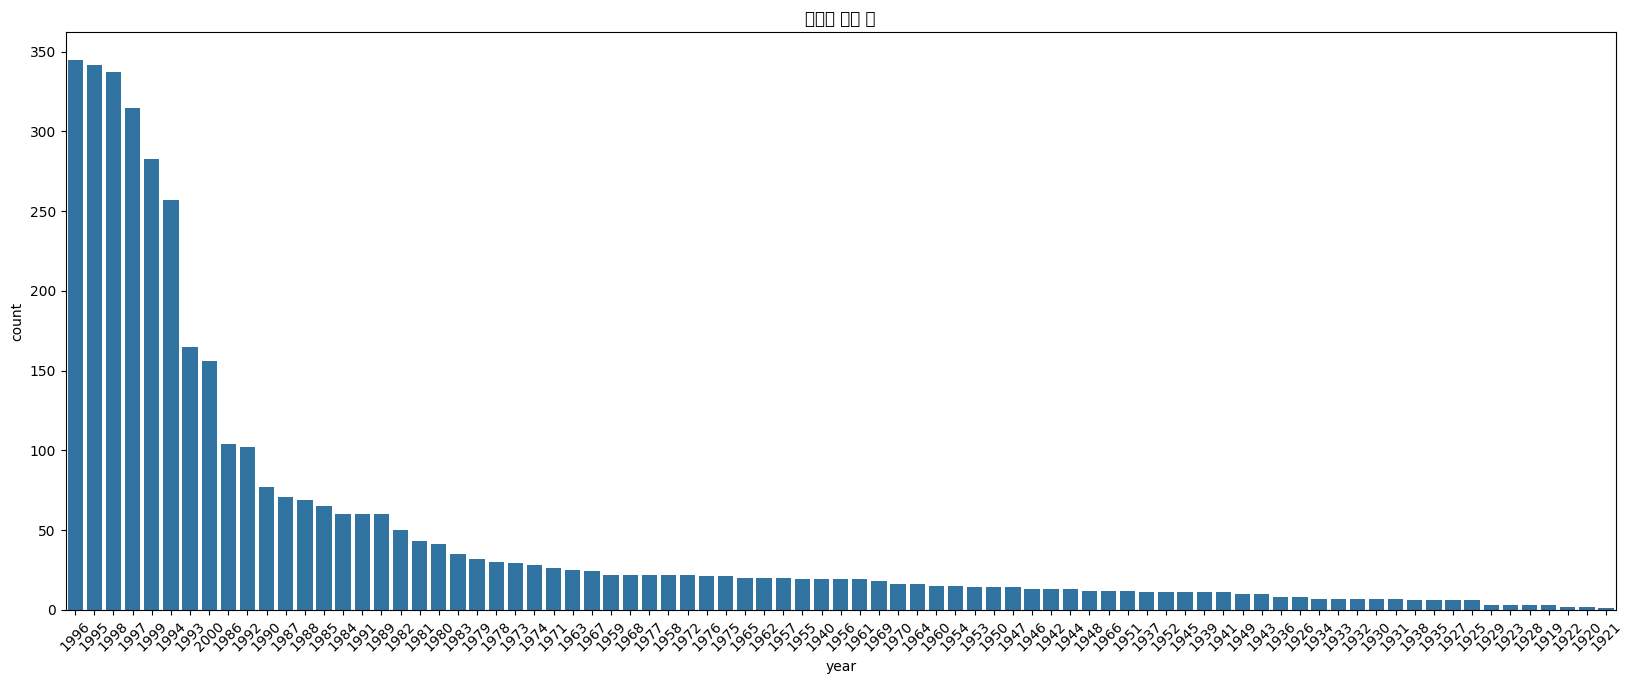

In [27]:
# seaborn 버전
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('연도별 영화 수')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 영화의 평점평균의 분포를 봅시다

# 영화별(movie_id)로 그룹화하여 평점(rating)의 평균을 구하고 데이터프레임으로 만듭니다.
# 결과적으로 인덱스는 movie_id가 되고, 값은 해당 영화의 평균 평점이 됩니다.
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()

# 컬럼 이름을 이해하기 쉽게 '영화ID', '평균평점', '평점개수'로 변경합니다.
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [29]:
# plotly 버전
px.histogram(mv_rating_agg, x='avg_rating', height=450, title='평점 분포')

In [30]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


In [31]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [32]:
# 컬럼이 2중으로 되어있는 문제 해결
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

In [33]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [34]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


In [35]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_mean', height=350, title='장르별 평점').update_xaxes(categoryorder="total descending")

In [36]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_count', height=350, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

In [37]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [38]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


In [39]:
px.bar(users, 
             x='occupation_nm', 
             y='user_id', 
             title='직업별 사용자 분포',
             labels={'occupation_nm': '직업', 'user_count': '사용자 수'},
             height=450).update_xaxes(categoryorder="total descending")